<a href="https://colab.research.google.com/github/siddhi1820/machine-learn/blob/main/loanaproval2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [ ]:
data=pd.read_csv('loan.csv')
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Education'].fillna(data['Education'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Property_Area'].fillna(data['Property_Area'].mode()[0],inplace=True)

In [ ]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
value=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']
le=LabelEncoder()
for val in value:
  data[val]=le.fit_transform(data[val])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(8), object(2)
memory usage: 62.5+ KB


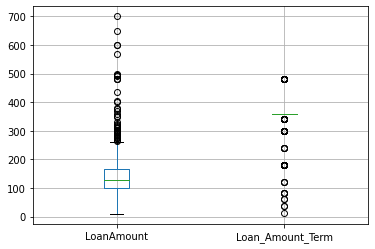

In [ ]:
num_col=['LoanAmount','Loan_Amount_Term']
data.boxplot(num_col)

In [ ]:
def outliar(n):
  for x in [n]:
     q75,q25=np.percentile(data.loc[:,x],[75,25])
     IQR=q75-q25
     max=q75+(1.5*IQR)
     min=q25-(1.5*IQR)
     data.loc[data[x]<min,x]=np.nan
     data.loc[data[x]>max,x]=np.nan
outliar('LoanAmount')


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           23
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
dtype: int64

In [ ]:
data3=['LoanAmount']
for x in data3:
  data[x].fillna(data[x].mean(),inplace=True)


In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
dtypes: float64(4), int64(8), object(2)
memory usage: 67.3+ KB


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,Y,4.986426
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,N,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,Y,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,Y,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,Y,4.948760


In [ ]:
data.drop('LoanAmount_log',axis=1,inplace=True)

In [ ]:
data2=['Gender','Education','Married','Credit_History','LoanAmount','Property_Area']
x=data[data2]
y=data['Loan_Status']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((429, 6), (185, 6), (429,), (185,))

In [ ]:
lo=LogisticRegression()
lo.fit(x_train,y_train)


LogisticRegression()

In [ ]:
x_test

,Gender,Education,Married,Credit_History,LoanAmount,Property_Area
455,1,0,1,1,96.000000,1
132,1,0,0,1,70.000000,1
244,1,1,1,1,123.000000,1
53,1,0,1,1,134.000000,2
264,1,0,0,1,128.000000,1
...,...,...,...,...,...,...
218,1,0,1,0,72.000000,1
400,1,1,1,0,45.000000,2
54,0,0,1,0,129.190345,2
440,1,0,0,1,187.000000,1


In [ ]:
y_pred=lo.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8540540540540541

In [ ]:
lo.score(x_test,y_test)

0.8540540540540541

In [ ]:
lo.score(x_train,y_train)

0.7902097902097902

In [ ]:
y_test

455    Y
132    Y
244    Y
53     N
264    Y
      ..
218    N
400    N
54     N
440    Y
585    N
Name: Loan_Status, Length: 185, dtype: object

In [ ]:
import joblib
filename='final_model'
joblib.dump(lo,filename)


['final_model']

In [ ]:
load_model=joblib.load('final_model')
load_model.score(x_test,y_test)

0.8540540540540541